In [1]:
!pip install -q opencv-python

In [2]:
!pip install -q tensorflow

In [3]:
import os
import random
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
import tensorflow as tf
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, SimpleRNN
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from PIL import Image
from PIL import UnidentifiedImageError

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import itertools
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

from keras import layers
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [4]:
apple = os.listdir('Data/apple')
orange = os.listdir('Data/orange')

In [5]:
img_w, img_h = 100, 100 
X = [] # empty list
y = []

In [6]:
for i in apple:
    try:
        img = Image.open('Data/apple/' + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(0)
    except UnidentifiedImageError: 
        pass 
    
for i in orange:
    try:
        img = Image.open('Data/orange/' + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(1)
    except UnidentifiedImageError:
        pass

In [7]:
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

(87, 100, 100, 3) (87,)


In [8]:
x = X.astype('float32')
x /= 255

In [9]:
num_classes = 2

In [10]:
labels = keras.utils.to_categorical(y, num_classes)
print(labels[0])

[1. 0.]


In [11]:
# splitting our dataset into train and test
from sklearn.model_selection import train_test_split
x_train1, x_test, y_train1, y_test = train_test_split(x, labels, test_size = 0.15, random_state=5)
x_train,x_val,y_train,y_val=train_test_split(x_train1,y_train1,test_size=0.15,random_state=5)


print(' train: {}'.format(len(x_train)))
print(' validation: {}'.format(len(x_val)))
print(' test: {}'.format(len(x_test)))


 train: 62
 validation: 11
 test: 14


In [12]:
datagen = ImageDataGenerator(
    rotation_range=20.,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=30.,
    zoom_range=0.2,
    horizontal_flip=0.2,
    rescale=None)
datagen.fit(x_train)

In [13]:
cnn = tf.keras.models.Sequential()

In [14]:
model = Sequential()
model.add(Conv2D(20,(3,3) ,activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(40,(3,3) ,activation="relu"))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 20)        560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 40)        7240      
                                                                 
 flatten (Flatten)           (None, 88360)             0         
                                                                 
 dense (Dense)               (None, 100)               8836100   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                      

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

In [17]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs = 30)

Epoch 1/30
2/2 [==============================] - 1s 422ms/step - loss: 0.5700 - accuracy: 0.7258 - val_loss: 5.0813 - val_accuracy: 0.7273
Epoch 2/30
2/2 [==============================] - 0s 243ms/step - loss: 5.4471 - accuracy: 0.5161 - val_loss: 4.7927 - val_accuracy: 0.2727
Epoch 3/30
2/2 [==============================] - 0s 234ms/step - loss: 3.2139 - accuracy: 0.6129 - val_loss: 3.1997 - val_accuracy: 0.2727
Epoch 4/30
2/2 [==============================] - 0s 232ms/step - loss: 1.2602 - accuracy: 0.6613 - val_loss: 0.1983 - val_accuracy: 0.9091
Epoch 5/30
2/2 [==============================] - 0s 245ms/step - loss: 0.6656 - accuracy: 0.6935 - val_loss: 0.4141 - val_accuracy: 0.8182
Epoch 6/30
2/2 [==============================] - 0s 252ms/step - loss: 0.5344 - accuracy: 0.7903 - val_loss: 0.2176 - val_accuracy: 0.9091
Epoch 7/30
2/2 [==============================] - 0s 244ms/step - loss: 0.2058 - accuracy: 0.9194 - val_loss: 0.3963 - val_accuracy: 0.7273
Epoch 8/30
2/2 [====

2/2 - 0s - loss: 5.7009e-05 - accuracy: 1.0000 - 88ms/epoch - 44ms/step


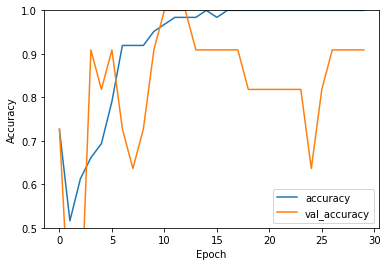

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_train,y_train,verbose=2)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [31]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

Metrics = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

y_true = true labels
y_pred = predicted labels
Round = round the value ex:-3.2 the round function will make to 3
clip = cliping the values like 0 to 1
epsilon = The reason why machine epsilon is important is that no matter how carefully we do operations like addition, subtraction, multiplication, or division with floating point numbers, we end up making an error when we round off our answer. That is what machine epsilon measures.

In [25]:
Metrics

 <function __main__.f1_score(y_true, y_pred)>]

1/1 [==============================] - 0s 33ms/step
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

       apple       0.86      0.75      0.80         8
      Orange       0.71      0.83      0.77         6

    accuracy                           0.79        14
   macro avg       0.79      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14



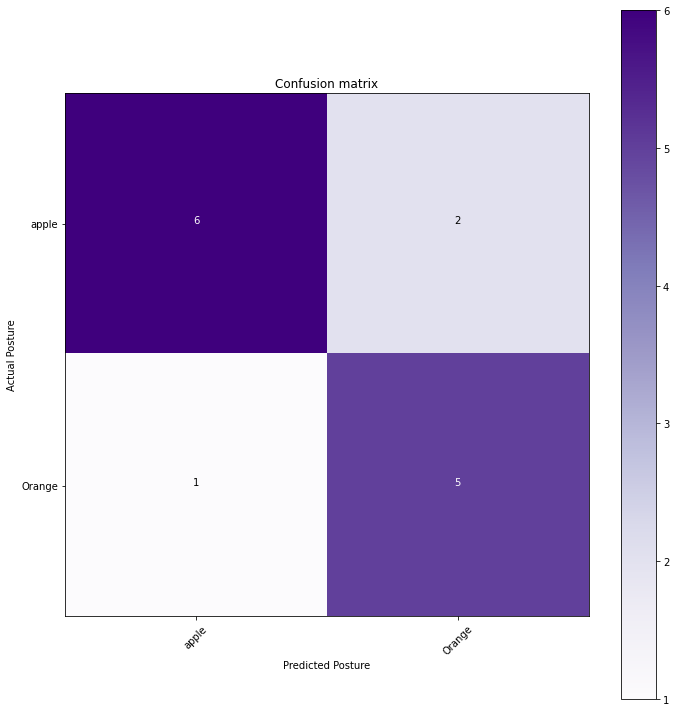

In [36]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix',cmap=plt.cm.Purples):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual Posture')
    plt.xlabel('Predicted Posture')

y_pred = (model.predict(x_test) > 0.5).astype("int32")
y_test_c = np.argmax(y_test, axis=1)
target_names = ["apple","Orange"]

Y_pred = np.argmax(model.predict(x_test),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_c, Y_pred)
plot_confusion_matrix(cm, target_names, normalize=False,title='Confusion matrix')

print('Classification Report')
print(classification_report(y_test_c, Y_pred, target_names=target_names))

out of 8 apples 2 apples are wrongly classified
out of 6 oranges 1 orange is wrongly classified

1/1 [==============================] - 0s 27ms/step


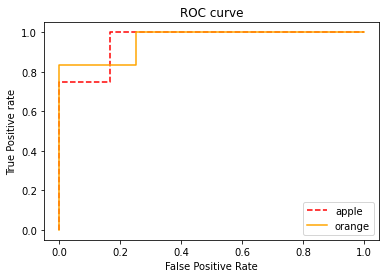

In [44]:
#
y_pred_cnb = model.predict(x_test)
y_prob_pred_cnb = model.predict(x_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')
# roc curve for classes
# crating set 
fpr = {}
tpr = {}
thresh ={}

n_class = 2
#creating moddedl
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_c, y_prob_pred_cnb[:,i], pos_label=i)
#putting the class and emplomemnting the code     
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='apple')
plt.plot(fpr[1], tpr[1], linestyle='-',color='orange', label='orange')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  
plt.show()




In [43]:
auc = metrics.roc_auc_score(y_test, y_prob_pred_cnb)

print(auc)


0.9583333333333334


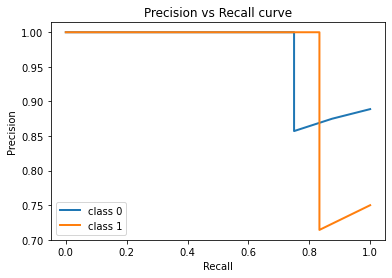

In [46]:
from sklearn.metrics import precision_recall_curve, roc_curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_prob_pred_cnb[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("Precision vs Recall curve")
plt.show()

In [47]:
auc = metrics.roc_auc_score(y_test, y_prob_pred_cnb)

print(auc)


0.9583333333333334


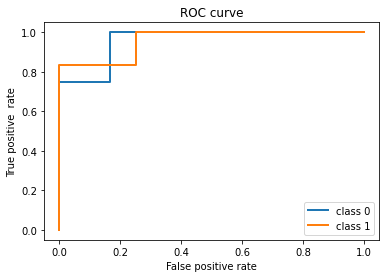

In [48]:
fpr = dict()
tpr = dict()
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], 
                                  y_prob_pred_cnb[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))
plt.xlabel("False positive rate")
plt.ylabel("True positive  rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()


In [49]:
auc = metrics.roc_auc_score(y_test, y_prob_pred_cnb)

print(auc)

0.9583333333333334
